## 8. Load the MNIST data (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use the first 40,000 instances for training, the next 10,000 for validation, and the last 10,000 for testing). Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM. Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist.data
y = mnist.target

print(X.shape)
print(y.shape)

c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


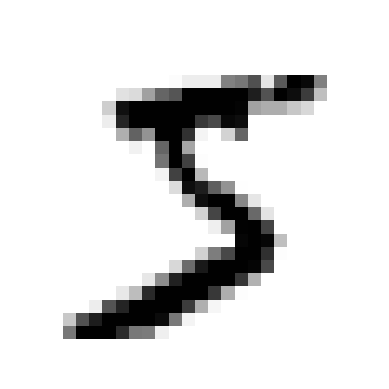

In [2]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

plot_digit(X[0])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=10000)

print(X_train.shape, X_val.shape, X_test.shape)

(50000, 784) (10000, 784) (10000, 784)


In [4]:
# Random Forest, Extra tree and SVM classifier for mnist dataset
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# Halving
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [5]:
# Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [100, 200, 300]}
rf = RandomForestClassifier()
rf_halving = HalvingGridSearchCV(rf, param_grid_rf, cv=2, scoring='accuracy', n_jobs=-1, factor=2)
rf_halving.fit(X_train, y_train)
print('Best parameters for Random Forest: ', rf_halving.best_params_)
print('Best score for Random Forest: ', rf_halving.best_score_)

Best parameters for Random Forest:  {'max_depth': 300, 'n_estimators': 300}
Best score for Random Forest:  0.9630000000000001


In [6]:
# Predict using the best model on X_test and y_test
y_pred_rf = rf_halving.predict(X_test)
print('Accuracy score for Random Forest: ', accuracy_score(y_test, y_pred_rf))
print('F1 weighted score for Random Forest: ', f1_score(y_test, y_pred_rf, average='weighted'))
print('Confusion matrix for Random Forest: \n', confusion_matrix(y_test, y_pred_rf))

Accuracy score for Random Forest:  0.9704
F1 weighted score for Random Forest:  0.9703667430931813
Confusion matrix for Random Forest: 
 [[ 940    0    1    0    0    2    1    0    4    1]
 [   0 1093    7    0    3    0    2    4    1    1]
 [   5    1 1027    3    4    0    3    5    3    0]
 [   1    3    7  985    1    7    1    3    7    6]
 [   3    2    0    0  937    0    0    2    4   11]
 [   4    0    1   10    2  819    8    1    6    3]
 [   7    3    2    0    0    9  963    0    0    0]
 [   0    4    9    0    6    1    0 1015    3    7]
 [   2    2    0   12    4    7    4    1  995   12]
 [   4    3    7   12    8    4    0   14    5  930]]


In [7]:
# Extra Trees classifier using HalvingGridSearchCV with param grid
from sklearn.ensemble import ExtraTreesClassifier
# Classification report
from sklearn.metrics import classification_report

# Create ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=42)

# Create param grid
param_grid_rt = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [0.5, 0.6, 0.7]
}

# Create HalvingGridSearchCV
halving_cv = HalvingGridSearchCV(et, param_grid_rt, cv=2, random_state=42)
halving_cv.fit(X_train, y_train)

# Print best params
print(f'Best params: {halving_cv.best_params_}')
print(f'Best score: {halving_cv.best_score_}')

# Clasification report
y_pred = halving_cv.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# SVM classifier on MNIST dataset with HalvingGridSearchCV

from sklearn.svm import SVC

param_grid = {
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'C': [1, 10, 100],
    'class_weight': ['balanced'],
    'coef0': [0.1]}

svm_clf = SVC(random_state=42)

halving_svc = HalvingGridSearchCV(svm_clf, param_grid, scoring='accuracy', factor=3, random_state=42)
halving_svc.fit(X_train, y_train)

c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\svm\_base.p


## 9. Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Congratulations, you have just trained a blender, and together with the classifiers they form a stacking ensemble! Now let’s evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier?